# I am working with the "Breast Cancer Wisconsin" dataset, which is commonly used for binary classification tasks. This dataset contains features computed from digitized images of fine needle aspirates (FNA) of breast mass. The goal is to classify whether a breast mass is malignant (cancerous) or benign (non-cancerous).

# Installing the necessary libraries

In [1]:
!pip install numpy pandas scikit-learn matplotlib

# Step 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Step 2: Load and Explore the Dataset

In [9]:
# Load the dataset from the CSV file
df = pd.read_csv("C:/Users/RACHANA R/OneDrive/Desktop/breast_cancer.csv")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Step 3: Data Preprocessing

In [11]:
# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Map 'M' (malignant) to 1 and 'B' (benign) to 0
y = y.map({'M': 1, 'B': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 4: Model Training

In [12]:
# Create an SVM classifier and fit it to the training data
clf = SVC()
clf.fit(X_train_scaled, y_train)


SVC()

# Step 5: Model Evaluation

In [13]:
# Predict labels for the test set
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Step 6: Visualize the Results (for two features)

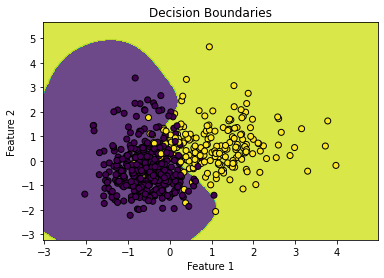

In [26]:
# Select two features for visualization
feature1 = 'radius_mean'  # Replace with the name of the first feature
feature2 = 'texture_mean'  # Replace with the name of the second feature

# Extract the selected features from the data
X_visualize = df[[feature1, feature2]].values

# Standardize the features using StandardScaler
scaler_visualize = StandardScaler()
X_visualize_scaled = scaler_visualize.fit_transform(X_visualize)

# Fit the SVM classifier to the standardized data
clf_visualize = SVC()
clf_visualize.fit(X_visualize_scaled, y)

# Plot the decision boundaries
plot_decision_boundary(clf_visualize, X_visualize_scaled, y)


# confusion matrix for SVC

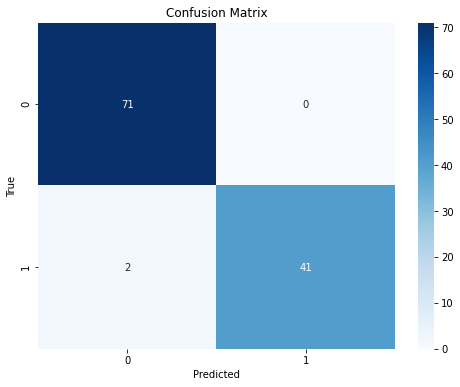

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Random Forest Classifier:

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier and fit it to the training data
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)

# Predict labels for the test set
rf_y_pred = rf_clf.predict(X_test_scaled)

# Calculate accuracy and display classification report
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))


Random Forest Accuracy: 0.9649122807017544
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Confusion matrix for Random Forest Classifier

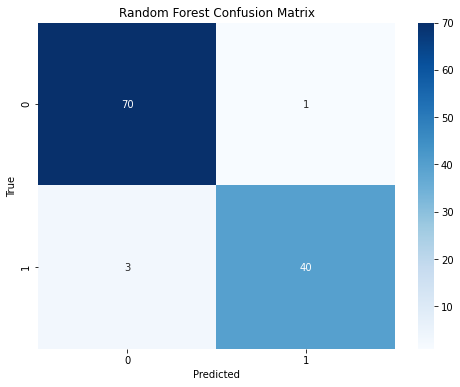

In [36]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_y_pred)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()


# Logistic Regression Classifier:

In [29]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier and fit it to the training data
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

# Predict labels for the test set
lr_y_pred = lr_clf.predict(X_test_scaled)

# Calculate accuracy and display classification report
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))


Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# confusion matrix for Logistic Regression

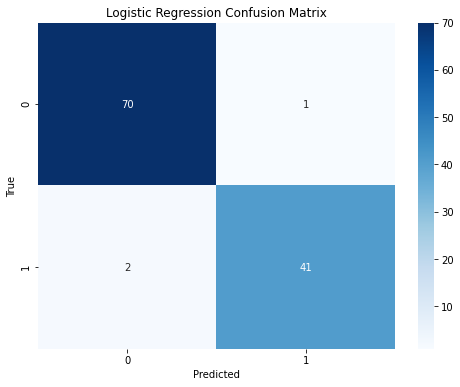

In [37]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, lr_y_pred)

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


# K-Nearest Neighbors Classifier:

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors classifier and fit it to the training data
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)

# Predict labels for the test set
knn_y_pred = knn_clf.predict(X_test_scaled)

# Calculate accuracy and display classification report
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_y_pred))


K-Nearest Neighbors Accuracy: 0.9473684210526315
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



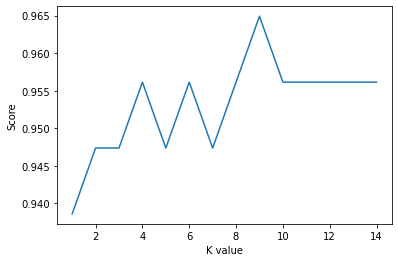

In [33]:
# lets find ideal k value

score_list = []

for each in range(1,15):
    
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train_scaled,y_train)
    score_list.append(knn2.score(X_test_scaled,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

best k values are 2 and 4

# confusion matrix for KNN

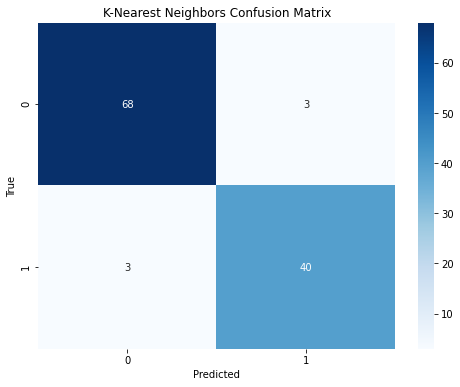

In [38]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for KNN
cm_knn = confusion_matrix(y_test, knn_y_pred)

# Plot the confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()


# Comparing the results of the classifiers used 

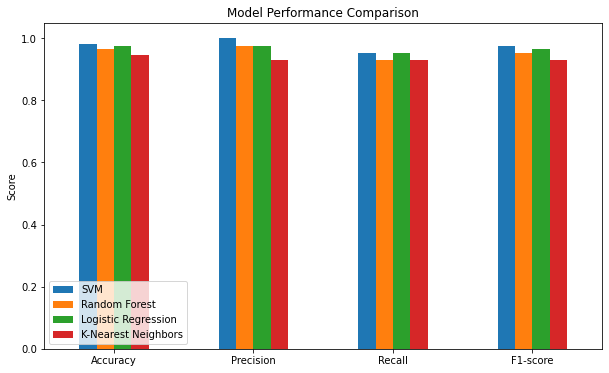

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a dictionary to store the evaluation metrics
metrics = {
    'SVM': {
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    },
    'Random Forest': {
        'Accuracy': rf_accuracy,
        'Precision': precision_score(y_test, rf_y_pred),
        'Recall': recall_score(y_test, rf_y_pred),
        'F1-score': f1_score(y_test, rf_y_pred)
    },
    'Logistic Regression': {
        'Accuracy': lr_accuracy,
        'Precision': precision_score(y_test, lr_y_pred),
        'Recall': recall_score(y_test, lr_y_pred),
        'F1-score': f1_score(y_test, lr_y_pred)
    },
    'K-Nearest Neighbors': {
        'Accuracy': knn_accuracy,
        'Precision': precision_score(y_test, knn_y_pred),
        'Recall': recall_score(y_test, knn_y_pred),
        'F1-score': f1_score(y_test, knn_y_pred)
    }
}

# Create a DataFrame to compare the metrics
metrics_df = pd.DataFrame(metrics)

# Plot bar plots for the evaluation metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=0)
plt.legend(loc='lower left')
plt.show()
